In [7]:
import os
import sys

import datetime as dt
import re
import math
import copy
import typing as ty

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [5]:
mainpath = os.environ['MAINPATH']
datapath = mainpath + '\\data'

In [10]:
data = pd.read_csv(f'{datapath}\\train.csv')
data.columns = [col.lower() for col in data.columns]

In [23]:
data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
def make_barplot(data:pd.DataFrame, bar_col:str) -> ty.Tuple[plt.Figure, plt.Axes]:
    '''
    Produce a count barplot of bar_col in data (excluding nulls)
    '''
    plot_data = data.copy()
    plot_data.dropna(subset=[bar_col], inplace=True)
    plot_data.loc[:, 'count'] = 1
    plot_data = plot_data.loc[:, [bar_col, 'count']]
    count_data = (
        plot_data
        .groupby(bar_col, as_index=False)
        .count()
        .sort_values(by=['count'], ascending=False)
        .reset_index(drop=True)
    )
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar(x=count_data.index, height=count_data.loc[:, 'count'])
    ax.set_xticks(count_data.index)
    ax.set_xticklabels(count_data.loc[:, bar_col])
    
    total_rows = len(data)
    non_null_rows = len(plot_data)
    
    ax.set_title(f'{bar_col}: {non_null_rows=} out of {total_rows=}')
    
    return fig, ax

In [ ]:
def make_cumdist_plot(data:pd.DataFrame, bar_col:str) -> ty.Tuple[plt.Figure, plt.Axes]:
    '''
    Produce a cumulative distribution plot
    '''
    plot_data = data.copy()
    plot_data.dropna(subset=[bar_col], inplace=True)
    plot_data.loc[:, 'count'] = 1
    plot_data = plot_data.loc[:, [bar_col, 'count']]
    count_data = (
        plot_data
        .groupby(bar_col, as_index=False)
        .count()
        .sort_values(by=['count'], ascending=False)
        .reset_index(drop=True)
    )
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar(x=count_data.index, height=count_data.loc[:, 'count'])
    ax.set_xticks(count_data.index)
    ax.set_xticklabels(count_data.loc[:, bar_col])
    
    total_rows = len(data)
    non_null_rows = len(plot_data)
    
    ax.set_title(f'{bar_col}: {non_null_rows=} out of {total_rows=}')
    
    return fig, ax

### MSSubClass Analysis

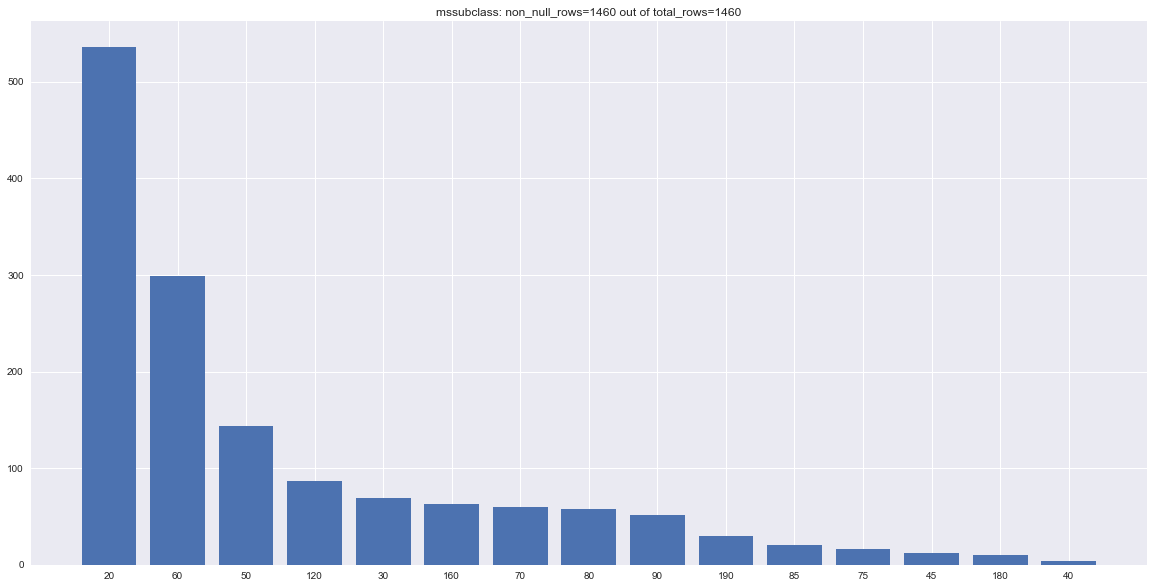

In [35]:
key_col = 'mssubclass'
fig, ax = make_barplot(data=data, bar_col=key_col)

In [38]:
mydf = pd.DataFrame({'a':['a', 'b']*5, 'v':range(10)})

AttributeError: 'Rectangle' object has no property 'plot'

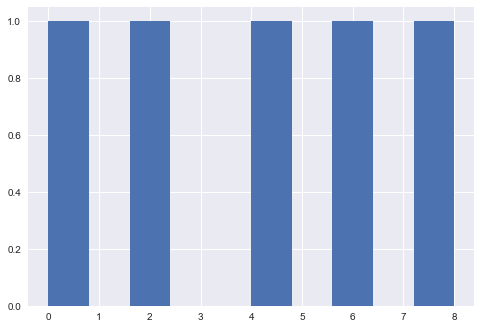

In [44]:
[a for a in dir(mydf.groupby('a')) if not a.startswith('_')]

['a',
 'agg',
 'aggregate',
 'all',
 'any',
 'apply',
 'backfill',
 'bfill',
 'boxplot',
 'corr',
 'corrwith',
 'count',
 'cov',
 'cumcount',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'dtypes',
 'ewm',
 'expanding',
 'ffill',
 'fillna',
 'filter',
 'first',
 'get_group',
 'groups',
 'head',
 'hist',
 'idxmax',
 'idxmin',
 'indices',
 'last',
 'mad',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'ngroup',
 'ngroups',
 'nth',
 'nunique',
 'ohlc',
 'pad',
 'pct_change',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'rank',
 'resample',
 'rolling',
 'sample',
 'sem',
 'shift',
 'size',
 'skew',
 'std',
 'sum',
 'tail',
 'take',
 'transform',
 'tshift',
 'v',
 'var']